Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(88800, 28, 28, 1)
(88800,)
(14800, 28, 28, 1)
(14800,)
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
(71040, 28, 28, 1)
(17760, 28, 28, 1)
(71040,)
(17760,)


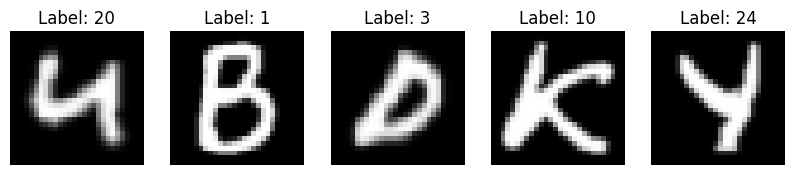

In [ ]:
#EMNIST DATASET Trained with CNN
# Preprcessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix

drive.mount('/content/drive')

# Load EMNIST Letters Dataset
train_df = pd.read_csv("/content/drive/My Drive/math156_project/emnist-letters-train.csv", header=None)
test_df = pd.read_csv("/content/drive/My Drive/math156_project/emnist-letters-test.csv", header=None)


# Data preprocessing
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values


# Normalization to [0, 1]
x_train, x_test = x_train / 255, x_test / 255

# Fix orientation
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

x_train = np.rot90(x_train, k=1, axes=(1, 2))  # Rotate 90 counterclockwise
x_train = np.fliplr(x_train)  # Flip horizontally

x_test = np.rot90(x_test, k=1, axes=(1, 2))
x_test = np.fliplr(x_test)

# Reshape data into 4D tensor
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Adjust label to 0-25
y_train -= 1
y_test -= 1

print(f"Unique labels: {np.unique(y_train)}")

# Create validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

# Visualization
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()



In [ ]:
depths = [32, 48]
kernel_sizes = [(3, 3), (7, 7)]
depths_2 = [64, 128]
kernel_sizes_2 = [(3,3), (4,4)]
depths_3 = [128, 256]
kernel_sizes_3 = [(3,3), (4,4)]



for depth_2 in depths_2:
    for kernel_size_2 in kernel_sizes_2:
        for depth_3 in depths_3:
            # Define the CNN model
            model = keras.Sequential([
                keras.Input(shape=(28, 28, 1)),
                keras.layers.Conv2D(64, [5, 5], activation='relu'),
                keras.layers.MaxPooling2D((2, 2)),
                keras.layers.Conv2D(depth_2, kernel_size_2, activation='relu'),
                keras.layers.MaxPooling2D((2, 2)),
                keras.layers.Conv2D(depth_3, [4, 4], activation='relu'),
                keras.layers.Flatten(),
                keras.layers.Dense(128, activation='relu'),
                keras.layers.Dropout(0.3),
                keras.layers.Dense(26, activation='softmax')
            ])

            # Compile the model
            model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            epochs = 10
            batch_size = 64

            print(f"depth1: {64}, kernel1: {5}, {5}, depth2: {depth_2}, kernel2: {kernel_size_2}, depth3: {depth_3}, kernel3: {4}, {4}")

            # Train the model and store history
            history = model.fit(x_train, y_train,
                                epochs=epochs,
                                batch_size=batch_size,
                                validation_data=(x_val, y_val))


depth1: 64, kernel1: 5, 5, depth2: 64, kernel2: (3, 3), depth3: 128, kernel3: 4, 4
Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6462 - loss: 1.1729 - val_accuracy: 0.9120 - val_loss: 0.2740
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8987 - loss: 0.3053 - val_accuracy: 0.9218 - val_loss: 0.2366
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9227 - loss: 0.2305 - val_accuracy: 0.9326 - val_loss: 0.2018
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9325 - loss: 0.1997 - val_accuracy: 0.9337 - val_loss: 0.2026
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9419 - loss: 0.1687 - val_accuracy: 0.9382 - val_loss: 0.1942
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9443 - loss: 0.1554 - val_accuracy: 0.9368 - val_loss: 0.1979
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9505 - loss: 0.1380 - val_accuracy: 0.9375 - val_loss: 0.1943
Epoch 

463/463 - 2s - 3ms/step - accuracy: 0.9279 - loss: 0.2576

Test accuracy: 0.9279
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       800
           1       0.97      0.97      0.97       800
           2       0.97      0.96      0.96       800
           3       0.95      0.95      0.95       800
           4       0.97      0.97      0.97       800
           5       0.99      0.97      0.98       800
           6       0.93      0.77      0.84       800
           7       0.94      0.96      0.95       800
           8       0.77      0.71      0.74       800
           9       0.97      0.95      0.96       800
          10       0.99      0.97      0.98       800
          11       0.73      0.80      0.76       800
          12       0.97      0.99      0.98       800
          13       0.97      0.94      0.96       800
          14       0.97      0.96      0.97

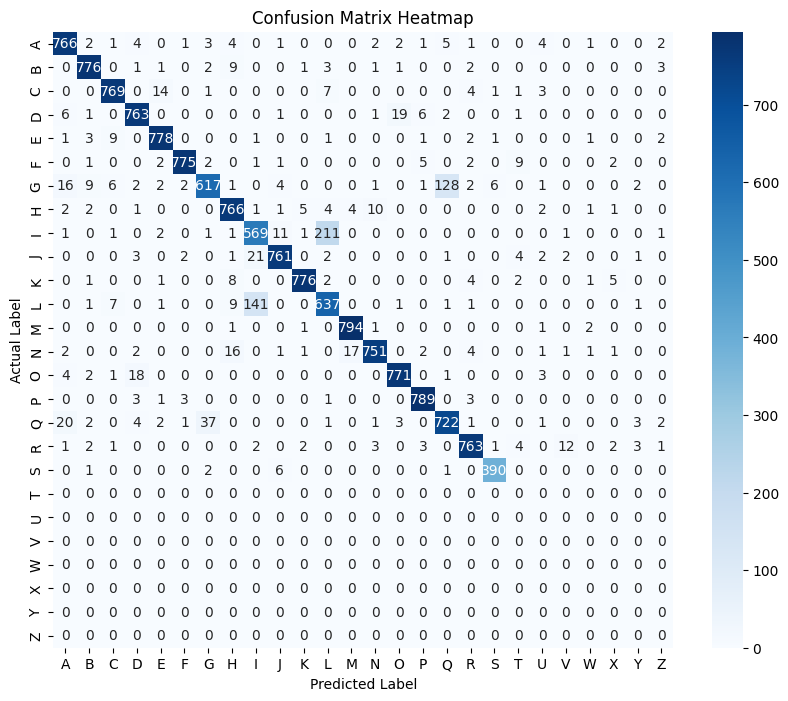

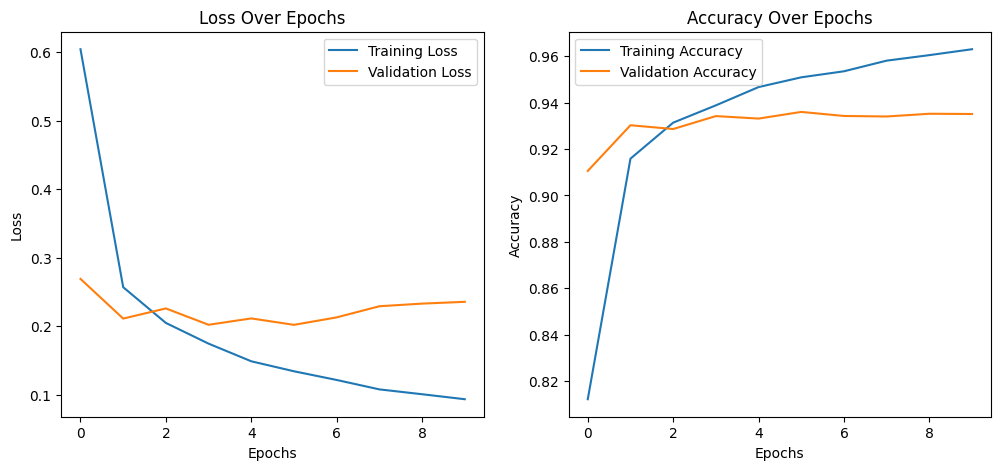

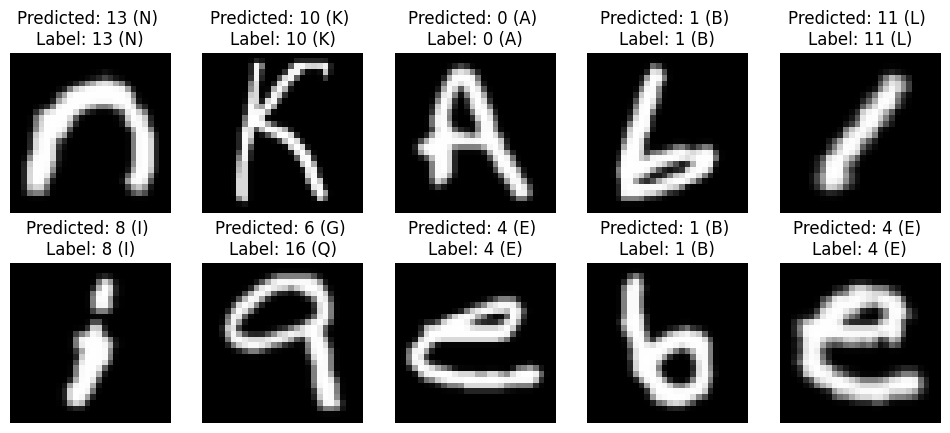

In [ ]:
import seaborn as sns

# Best hyperparameters

# Define the best CNN model
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (5, 5), activation='relu'),  # 64 filters, 5x5 kernel
    keras.layers.MaxPooling2D((2, 2)),  # Downsampling
    keras.layers.Conv2D(128, (3, 3), activation='relu'),  # 128 filters, 3x3 kernel
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(256, (4, 4), activation='relu'),  # 256 filters, 4x4 kernel
    keras.layers.Flatten(),  # Flatten to feed into Dense layers
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),  # Prevent overfitting
    keras.layers.Dense(26, activation='softmax')  # Output layer (26 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
batch_size = 64

# Train the model
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), verbose = False)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Make a prediction
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute and display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, zero_division=1))

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[chr(i + 65) for i in range(26)], yticklabels=[chr(i + 65) for i in range(26)])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Extract loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.show()

# Show 10 random example test images
indices = np.random.choice(len(x_test), 10, replace=False)
plt.figure(figsize=(12,5))
for i, idx in enumerate(indices):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
  predicted_label = np.argmax(y_pred[idx])
  predicted_label_letter = chr(predicted_label + 65)
  actual_label_letter = chr(y_test[idx] + 65)
  plt.title(f"Predicted: {predicted_label} ({predicted_label_letter}) \nLabel: {y_test[idx]} ({actual_label_letter})")
  plt.axis("off")
plt.show()

<ipython-input-7-805863d1d1f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Test Accuracy", "Test Loss"], y=[test_acc, test_loss], palette="Blues")


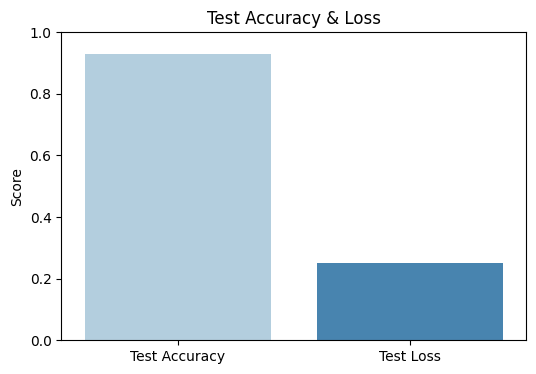

In [ ]:
# Plot test accuracy and loss
plt.figure(figsize=(6, 4))
sns.barplot(x=["Test Accuracy", "Test Loss"], y=[test_acc, test_loss], palette="Blues")
plt.ylim(0, 1)  # Accuracy is between 0 and 1, so we scale accordingly
plt.title("Test Accuracy & Loss")
plt.ylabel("Score")
plt.show()
